## 주성분분석 Principal Component Analysis

<img src = 'img/pca.gif'>

* 자료의 요약이나 '선형관계식'을 통해  
    '차원수'를 감소시켜 데이터해석을 용이하게 하는데 있음
* 서로 상관이 없거나 독립적인 새로운 변수들을   
    이용해서 정보손실을 최소화하도록 함


* 둘 이상의 양적변수등 사이에서 분산/공분산 관계를 이용하여   
    변수들의 선형결합으로 나타나는 주성분을 찾고
* 이 중 중요한 n개의 주성분으로 전체변동의 대부분을 설명하고자 하는 다변량 분석법  
    
        

* 예를 들어, 8x8크기의 손글씨 데이터 경우 총 64개의 특성으로 구성되어 있는데
* 글씨가 쓰여진 영역만 따로 골라서 분석에 활용한다면 64개의 특성이 모두 다 필요한 것은 아님

* 차원축소 방법 - 투영/사영projection
    + 먼저, 데이터에 임의의 초평면을 정의한 다음, 데이터들을 이 평면에 투영함
    + 그런 다음, 데이터의 분산이 최대로 보존되는지 확인


* PCA를 이용해 고차원의 데이터를
    + 정보손실없이 변환함으로써 시각화가 편리해지고
    + 데이터의 크기가 감소함으로써 빠른 학습이 가능해짐


* PCA 분석을 위해 공분산/고유벡터/고유값에 대한 개념 필요 - 선형대수

## 고유값/고유벡터 찾아보기
* Ax = λχ
* 선형번환 A = [[3,1],[1,3]]을 만족하는 고유벡터와 고유값은?

In [8]:
A = [[3,1],[1,3]]   # 선형변환
x1 = [-1 , 1]
x2 = [1, 1]

In [11]:
x3 = np.dot(A, x1)   # 행렬  곱연산, 선형변환 적용
x4 = np.dot(A, x2)

In [12]:
origin = [0],[0]    # 벡터공간 원점 정의

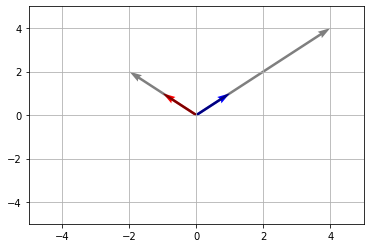

In [38]:
# 변환전 벡터
# quiver 함수 : 그래프의 화살표 벡터를 표시
# quiver(원점, x좌표, y좌표, 색상, 각도, 단위)
plt.quiver(*origin, x1[0],x1[1], color='r', angles='xy', scale_units='xy', scale=1)

plt.quiver(*origin, x2[0],x2[1], color='b', angles='xy', scale_units='xy', scale=1)

# 변환후 벡터

plt.quiver(*origin, x3[0],x3[1], color='k', alpha=0.5, angles='xy', scale_units='xy', scale=1)

plt.quiver(*origin, x4[0],x4[1], color='k', alpha=0.5, angles='xy', scale_units='xy', scale=1)


plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid(True)


In [41]:
# numpy함수로 고유값 알아내기

np.set_printoptions(formatter={'float_kind':'{:.0f}'.format},suppress=True)

A = np.array([[3,1],[1,3]])
eigval, eigvec = np.linalg.eig(A)
eigval, eigvec

(array([4, 2]),
 array([[1, -1],
        [1, 1]]))

## 주성분 분석 순서
* 먼저 데이터를 표준화/정규화한 후
* 각 변수간 공분산을 구하고
* 이것을 이용해서 고유값/고유벡터를 구함
* 분산이 큰 고유벡터를 찾아 데이터를 이것에 투영해서
* 그 결과값들을 분석이나 시각화에 사용

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
iris = load_iris()
data = iris.data
target = iris.target

In [4]:
# 전처리

data = StandardScaler().fit_transform(data)

## 공분산 계산
* 각 독립변수(특성)별 상관관계 파악
* 그러기 위해서는 특성들을 전치행렬로 변환해야 함
* 전치행렬은 객체명.T로 간단히 만들수 있음

In [6]:
cov_matrix=np.cov(data.T)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

## 공분산의 고유값/고유벡터 계산
* numpy에서 linalg.eig함수 제공

In [8]:
eigval, eigvec = np.linalg.eig(cov_matrix)
eigval, eigvec

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [11]:
# 데이터의 차원을 1차원으로 변환했을때  73%
# 2차원으로 변환하는 경우 73+23% 정도로
# 고유 데이터의 분산을 유지할 수 있음

eigval/sum(eigval)

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

## 고유값을 이용해서 적절한 주성분 갯수 선택
* 스크리scree 그래프 이용

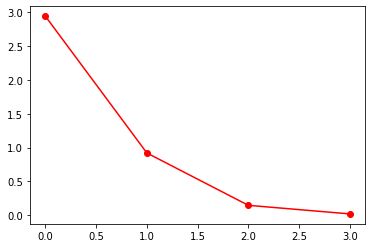

In [12]:
plt.plot(eigval, 'ro-')

In [15]:
# 투영한 결과를 데이터프레임에 생성
# 즉, 4차원 데이터를 고유벡터로 투영함
# A벡터를 B벡터에 투열했을때 투영된 벡터의 길이를 구하는 공식
# x.y / || y ||
# x.y => np.dot(x,y)   / x.dot(y)
# || y || => np.linalg.norm(y)

In [29]:
projX1 = data.dot(eigvec.T[0]) / np.linalg.norm(eigvec.T[0])
result = pd.DataFrame(projX1, columns=['PC1'])

In [30]:
projX2 = data.dot(eigvec.T[1]) / np.linalg.norm(eigvec.T[1])
result['PC2']= projX2

In [31]:
result['target'] = target

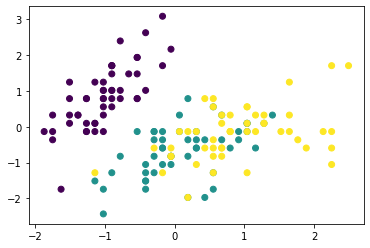

In [32]:
# 기존 변수로 시각화
plt.scatter(data[:,0], data[:,1], c=target)

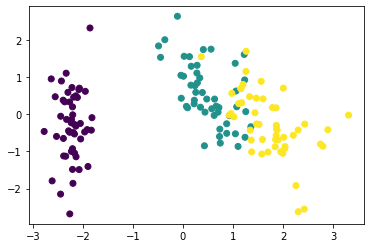

In [33]:
# 주성분 분서 후 시각화
plt.scatter(result.PC1, result.PC2, c=target)

## sklearn으로 PCA분석

In [36]:
# n_components : 차원축소할 차원수 지정
pca = PCA(n_components=2)
pcaXY = pca.fit_transform(data)
result = pd.DataFrame(pcaXY, columns=['PC1','PC2'])
result['target'] = target

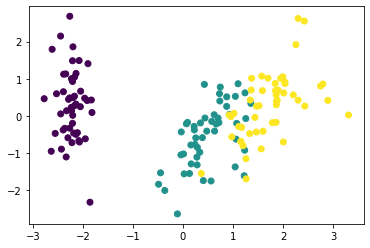

In [37]:
plt.scatter(result.PC1, result.PC2, c=target)

## 89구역 54개의 공원 잔디 식물종 분석
* 1~54컬럼만 추출해서 주성분분석 실시
* plot : 실험조건
* species : 식물종
* hey : 건초량
* pH : 토양산성도